# Convolutional Neural Network (CNN) via Tensorflow

- mainly used to analysis images.
- 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pydicom 
import os

(512, 512)


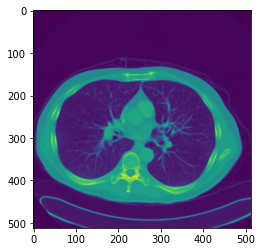

In [3]:
# check one image (512x512)
# https://www.kaggle.com/datasets/kmader/siim-medical-images
sample_dcm = "./archive/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(sample_dcm)

ct = dicom_file.pixel_array # load the image pixel data as a numpy array
plt.figure()
plt.imshow(ct)
print(ct.shape)

In [6]:
# resize original image, and show basic information of the dataset
path_dir = Path('./archive/dicom_dir')
all_files = list(path_dir.glob("*"))
dicom_images = []
import cv2
for path in all_files:
    data = pydicom.read_file(path).pixel_array # read all DICOM files
    data = cv2.resize(data,(256,256))
    dicom_images.append(data)
print(len(dicom_images))
X = np.array(dicom_images)
print(X.shape)
# reshape with 3 dimension for CNN
X = X.reshape(100, 256,256, 1)
print(X.shape)

100
(100, 256, 256)
(100, 256, 256, 1)


In [8]:
# get labels, supervised learning, there are two classes
labels =[]
for file in os.listdir('./archive/dicom_dir'):
    labels.append(file.split('_')[-2])
print(len(labels))
y = np.array(labels)
set(labels)

100


{'0', '1'}

In [9]:
# split into train set and test set
from sklearn.model_selection import train_test_split as tts
X_trains, X_tests, y_train, y_test = tts(X, y, test_size = 0.2)
X_train= X_trains.astype('float32')/255.0 # convert image to floats in [0, 1] range
X_test= X_tests.astype('float32')/255.0

In [10]:
# convert label into one-hot coding
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
from tensorflow.keras import datasets,models,layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1000000)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2000002   
Total params: 2,018,818
Trainable params: 2,018,818
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10,verbose=1)

Train on 80 samples
Epoch 1/10
80/80 [==============================] - 3s 43ms/sample - loss: 6.9435 - accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 3/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 4/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 5/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 6/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 7/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 8/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 9/10
80/80 [==============================] - 1s 11ms/sample - loss: 7.6561 - accuracy: 0.5250
Epoch 10/10
80/80 [==============================] - 1s 11ms/sample - l

20/20 [==============================] - 1s 38ms/sample - loss: 9.6709 - accuracy: 0.4000
Accuracy of model is : 0.400


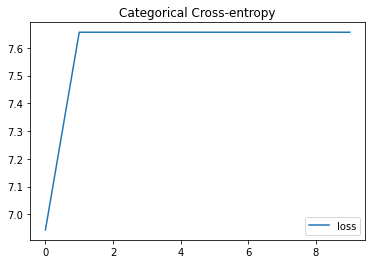

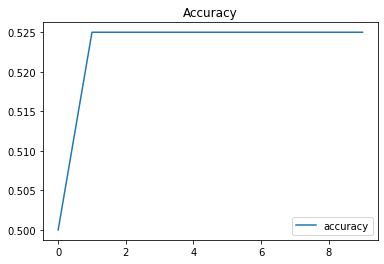

In [13]:
# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")
print('Accuracy of model is : %.3f' %acc)

Predicted = 1
Actual: 1


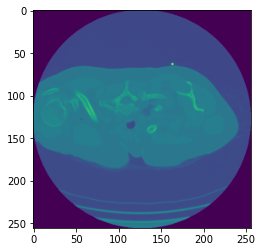

In [15]:
# Predict Model
image=X_train[0]
from numpy import argmax
ypred= model.predict(np.asarray([image]))
print('Predicted = %d' %argmax(ypred))
print('Actual:', y[0])
plt.imshow(X_train[0])